# COREv2 files 
#### GOAL: Understnad if there is a climate trend, and/or why this forcing system can be used for inter-annual studies. These are located `/glade/u/home/gabyn/work/cesm_checkout/active_case/cases/g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595/CaseDocs`

#### And the list of forcing files are: 
- datm.streams.txt.CORE2_IAF.CORE2.ArcFactor
- datm.streams.txt.CORE2_IAF.GCGCS.PREC
- datm.streams.txt.CORE2_IAF.GISS.LWDN
- datm.streams.txt.CORE2_IAF.GISS.SWDN
- datm.streams.txt.CORE2_IAF.GISS.SWUP
- datm.streams.txt.CORE2_IAF.NCEP.DN10
- datm.streams.txt.CORE2_IAF.NCEP.Q_10
- datm.streams.txt.CORE2_IAF.NCEP.SLP_
- datm.streams.txt.CORE2_IAF.NCEP.T_10
- datm.streams.txt.CORE2_IAF.NCEP.U_10
- datm.streams.txt.CORE2_IAF.NCEP.V_10
- datm.streams.txt.presaero.clim_1850

In [1]:
import os
import glob
from glob import glob
from subprocess import check_call
import yaml
import warnings
warnings.simplefilter("ignore") # Silence warnings
import matplotlib.pyplot as plt
import pylab 
import numpy as np

import xarray as xr

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
core2_t10 = '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.*'

## Import temperature files 

In [4]:
# Here are the new test files 
newNCDFfiles = sorted(glob(f"{core2_t10}.nc", recursive=True),key=numericalSort)

### Checking what the difference is between files like `ncep.t_10.T62.2005.20120414.nc` and  `ncep.t_10.T62.2005.nc`

In [5]:
newNCDFfiles[61]
ds_01= xr.open_mfdataset(newNCDFfiles[61],combine='by_coords')

In [6]:
newNCDFfiles[62]
ds_02= xr.open_mfdataset(newNCDFfiles[62],combine='by_coords')

In [7]:
newNCDFfiles[61]

'/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.2005.20120414.nc'

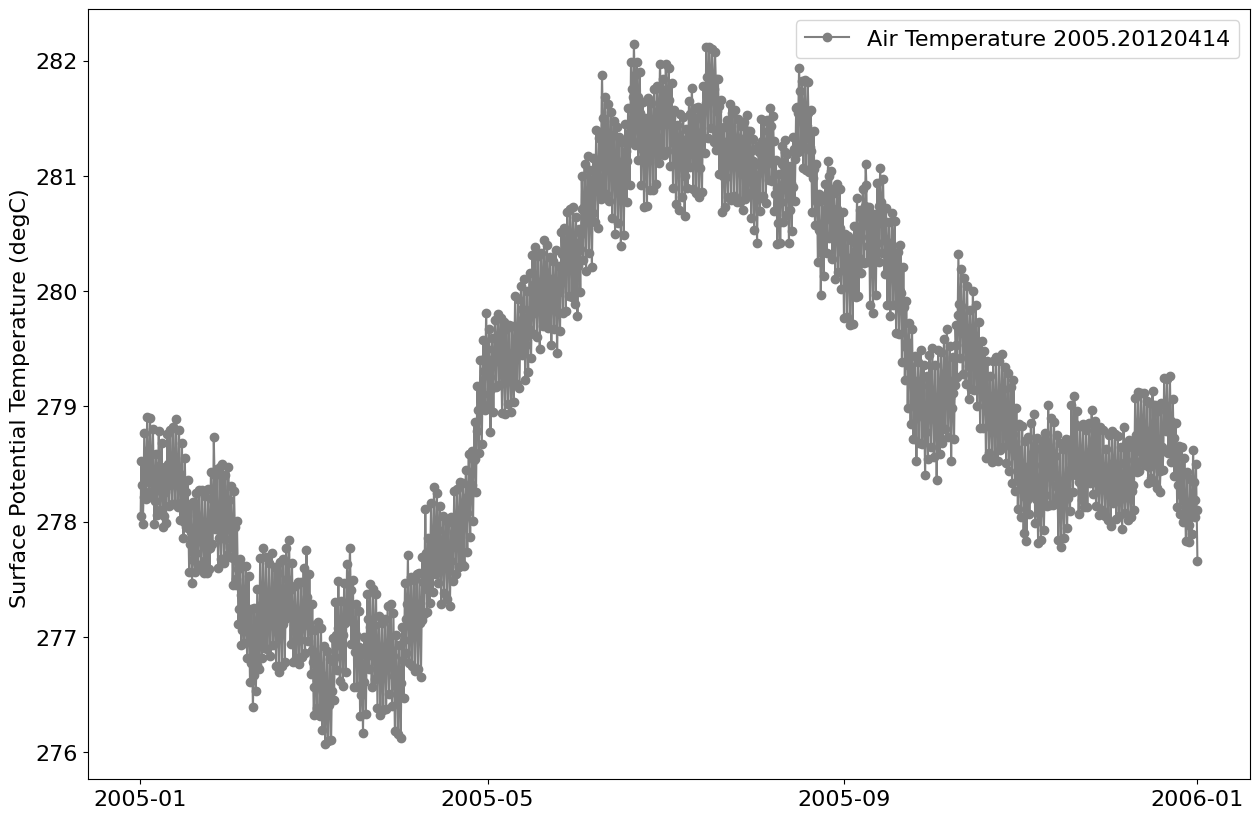

In [8]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(ds_01.time,np.mean(ds_01.t_10[:,:,:],axis=(1,2)), 'o-', color='gray', label = 'Air Temperature 2005.20120414')
pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

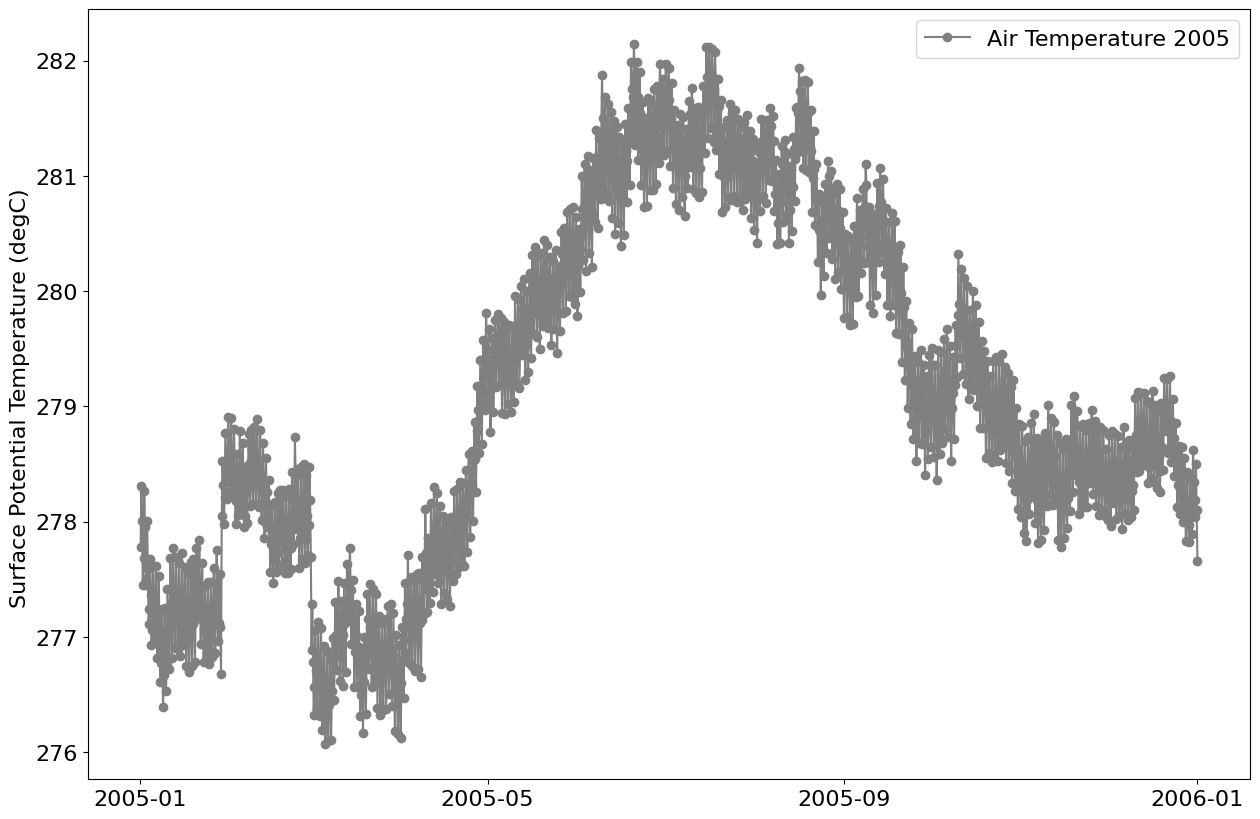

In [9]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(ds_01.time,np.mean(ds_02.t_10[:,:,:],axis=(1,2)), 'o-', color='gray', label = 'Air Temperature 2005')
pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

## Most of the difference in these two files is in the beggining

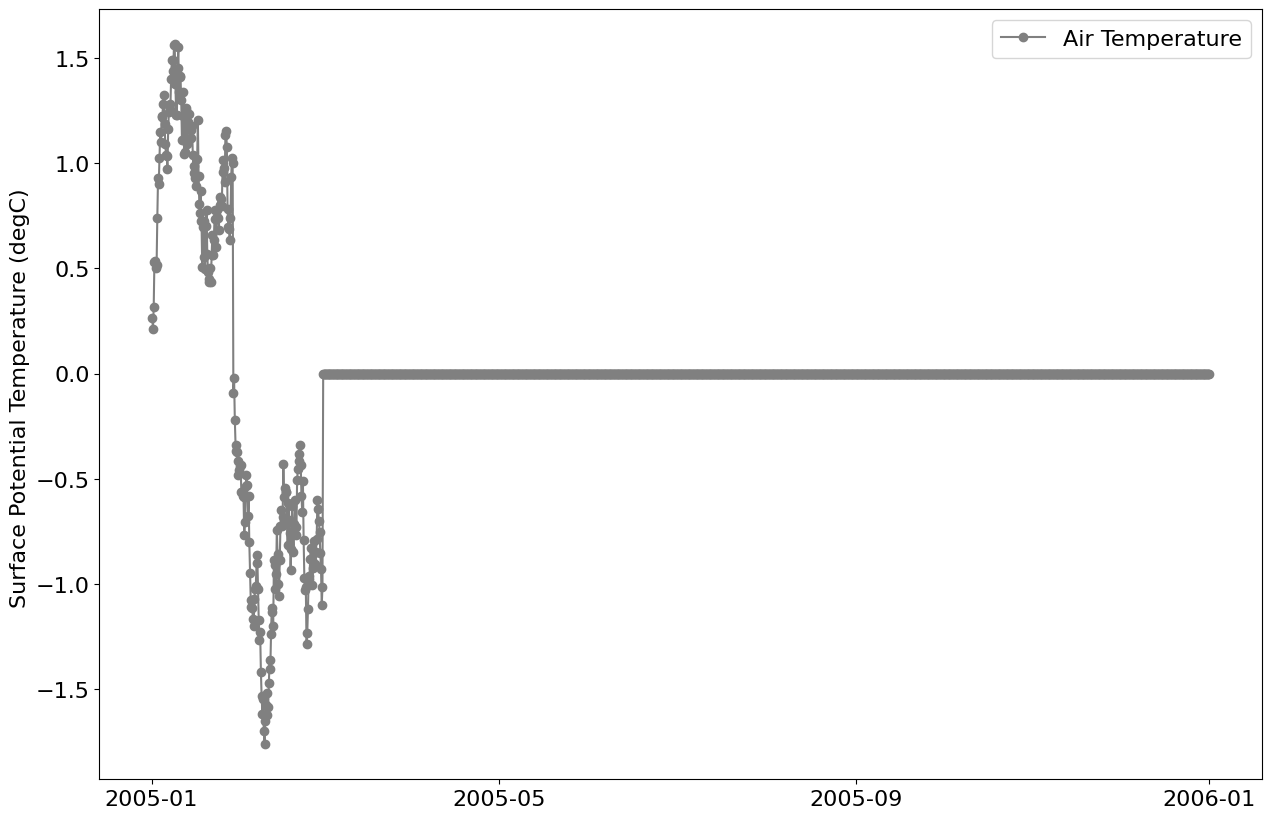

In [10]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(ds_01.time,np.mean(ds_01.t_10[:,:,:],axis=(1,2))-np.mean(ds_02.t_10[:,:,:],axis=(1,2)), 'o-', color='gray', label = 'Air Temperature')
pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

### It seems that there is a differnece in the climatology for the first few months, but eveything else is the same... but keep in mind that under `/glade/u/home/gabyn/work/cesm_checkout/active_case/cases/g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595/CaseDocs/datm.streams.txt.CORE2_IAF.NCEP.T_10`, the files that are used are the normal files until 2005, adn then the 2012 files for 2015, 2008 and 2009 

In [11]:
files = (newNCDFfiles[0:49],newNCDFfiles[50],
         newNCDFfiles[52],
        newNCDFfiles[54],
        newNCDFfiles[56],
        newNCDFfiles[57:62],
        newNCDFfiles[63:67])

In [12]:
files_02 = [newNCDFfiles[50],newNCDFfiles[52],newNCDFfiles[54],newNCDFfiles[56]]

In [13]:
files = newNCDFfiles[0:49]+files_02+newNCDFfiles[57:62]+newNCDFfiles[63:67]

In [14]:
files

['/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1948.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1949.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1950.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1951.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1952.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1953.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1954.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1955.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1956.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1957.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1958.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1959.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1960.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1961.nc',
 '/glade/p/cesmdata/cseg/inputdata/ocn/iaf/ncep.t_10.T62.1962.

In [15]:
ds= xr.open_mfdataset(files,combine='by_coords')

| Initials  | Name                       | Latitude          | Longitude             |
|-----------|----------------------------|-------------------|-----------------------|
| `ao`      | Central Arctic             | $90^oN$ to $80^oN$ |  All                 |
| `cs`      | Chukchi Sea                | $80^oN$ to $60^oN$ |$-180^o$ to $-155^oW$ |
| `bs`      | Beaufort Sea               | $80^oN$ to $60^oN$ |$-155^oW$ to $-125^oW$|
| `ca`      | Canadian Archipelago       | $80^oN$ to $60^oN$ |$-125^oW$ to $-100^oW$ |
| `bb`      | Baffin Sea                 | $80^oN$ to $60^oN$ |$-100^oW$ to $-45^oW$  |                      
| `ess`     | Eastern Siberian Sea       | $80^oN$ to $60^oN$ |$145^oE$ to $180^o$   |                       
| `ls`      | Laptev Sea                 | $80^oN$ to $60^oN$ |$90^oE$ to $145^oE$   |                      
| `ks`      | Kara Sea                   | $80^oN$ to $60^oN$ |$53^oE$ to $90^oE$    |                      
| `bts`     | Barents Sea                | $80^oN$ to $60^oN$ |$20^oE$ to $53^oE$    |                      
| `ns`      | Nordic Sea                 | $80^oN$ to $60^oN$ |$-45^oW$ to $20^oE$   | 

## this is the actual values of the differnt regions that I want 
Arctic Regions

|Region| Latitude | Longitude | Matrix Inputs       |
|------|----------|-----------|---------------------|
|`ao`  |218:230   |:          |`[:,218:230,:]`      |
|`cs`  |191:218   |0:25       |`[:,191:218,96:110]`   |
|`bs`  |191:218   | 25:55     |`[:,191:218,110:125]`  |
|`ca`  |191:218   |55:80     |`[:,191:218,125:139]` |
|`bb`  |191:218   |80:135    |`[:,191:218,139:166]`|
|`ess` |191:218   |325:360    |`[:191:218,77:96]` |
|`ls`  |191:218   |270:325    |`[:,191:218,48:77]`|
|`ks`  |191:218   |233:270    |`[:,191:218,28:48]`|
|`bts` |191:218   |200:233    |`[:,191:218,11:28]`|
|`ns`  |191:218   |155:200    |`[:,191:218,166:11]`|

In [16]:
lat = 230
lon = 192
arctic = np.zeros((12,lat,lon))
for i in range(218,230):
    arctic[:,i,:] = 0
    
for i in range(96,110):
    for j in range(191,218):
        arctic[:,j,i] = 1
        
for i in range(110,125):
    for j in range(191,218):
        arctic[:,j,i] = 2
        
for i in range(125,139):
    for j in range(191,218):
        arctic[:,j,i] = 3
        
for i in range(139,166):
    for j in range(191,218):
        arctic[:,j,i] = 4

for i in range(77,96):
    for j in range(191,218):
        arctic[:,j,i] = 9

for i in range(48,77):
    for j in range(191,218):
        arctic[:,j,i] = 8

for i in range(28,48):
    for j in range(191,218):
        arctic[:,j,i] = 7

for i in range(11,28):
    for j in range(191,218):
        arctic[:,j,i] = 6

for i in list(range(11)) + list(range(-27,1)):
    for j in range(191,218):
        arctic[:,j,i] = 5

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import pylab 

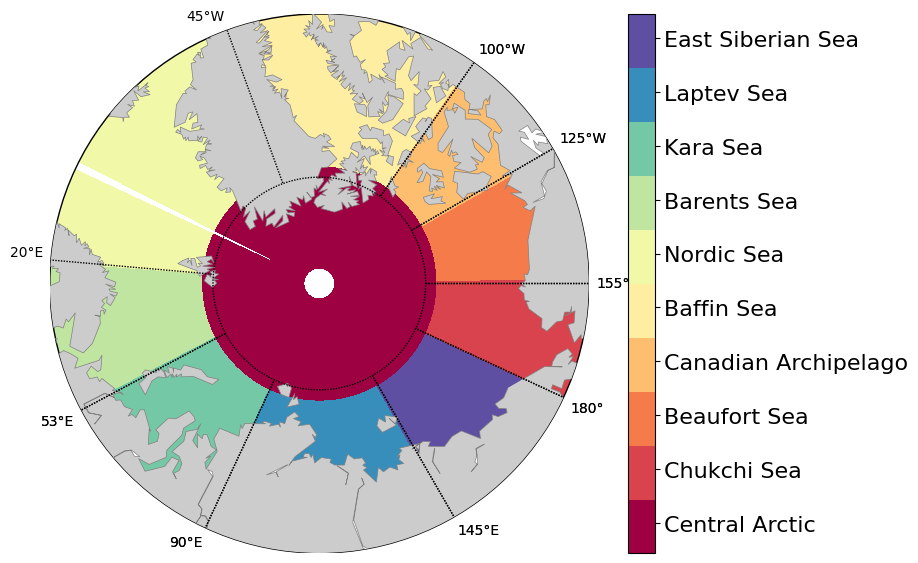

In [18]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True,
            boundinglat=65,
            lon_0=180+(-100+-30)/2.,resolution='c')

x, y = m(*np.meshgrid(ds.lon,ds.lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,arctic[0,:,:],shading='flat',cmap=plt.cm.get_cmap('Spectral', 10))
cbar=plt.colorbar() 
cbar.set_ticks([0.5,1.4,2.3,3.2,4.1,5.0,5.9,6.8,7.7,8.6])
cbar.set_ticklabels(['Central Arctic', 'Chukchi Sea', 'Beaufort Sea','Canadian Archipelago',
                     'Baffin Sea','Nordic Sea','Barents Sea','Kara Sea','Laptev Sea',
                     'East Siberian Sea'])
cbar.ax.tick_params(labelsize=16)


m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
m.plot
plt.show()

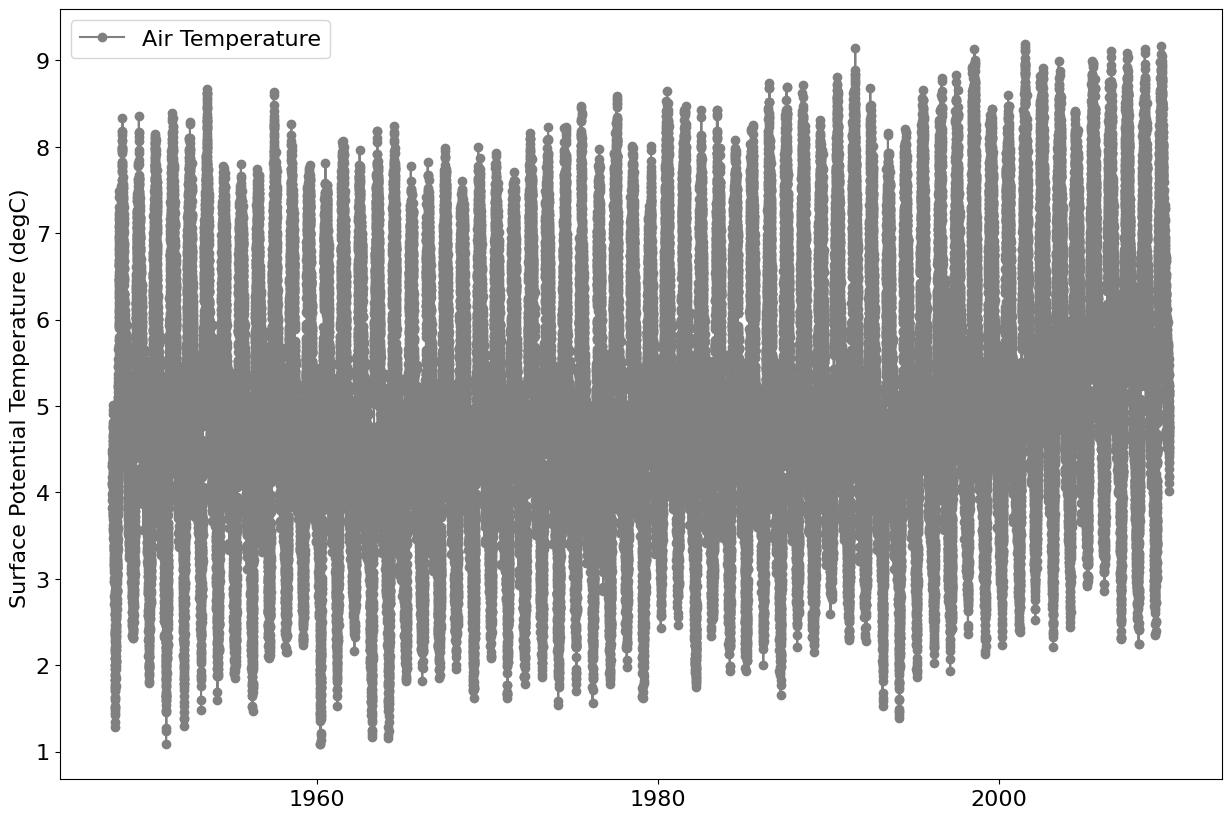

In [19]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(ds.time,np.mean(ds.t_10[:,:,:],axis=(1,2))-273.15, 'o-', color='gray', label = 'Air Temperature')
pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

## Timeseries by Arctic Region
-- every 6 hours ---

In [20]:
temp_ao = np.nanmean(ds.t_10[:,218:230,:], axis=(1,2))
temp_cs = np.nanmean(ds.t_10[:,191:218,96:110], axis = (1,2))
temp_bs = np.nanmean(ds.t_10[:,191:218,110:125], axis = (1,2))
temp_ca = np.nanmean(ds.t_10[:,191:218,125:139], axis = (1,2))
temp_bb = np.nanmean(ds.t_10[:,191:218,139:166], axis = (1,2))
temp_ess = np.nanmean(ds.t_10[:,191:218,77:96], axis = (1,2))
temp_ls = np.nanmean(ds.t_10[:,191:218,48:77], axis = (1,2))
temp_ns = np.nanmean(ds.t_10[:,191:218,list(range(11)) + list(range(-27,1))], axis = (1,2))
temp_bts =np.nanmean(ds.t_10[:,191:218,11:28], axis = (1,2))
temp_ks = np.nanmean(ds.t_10[:,191:218,28:48], axis = (1,2))

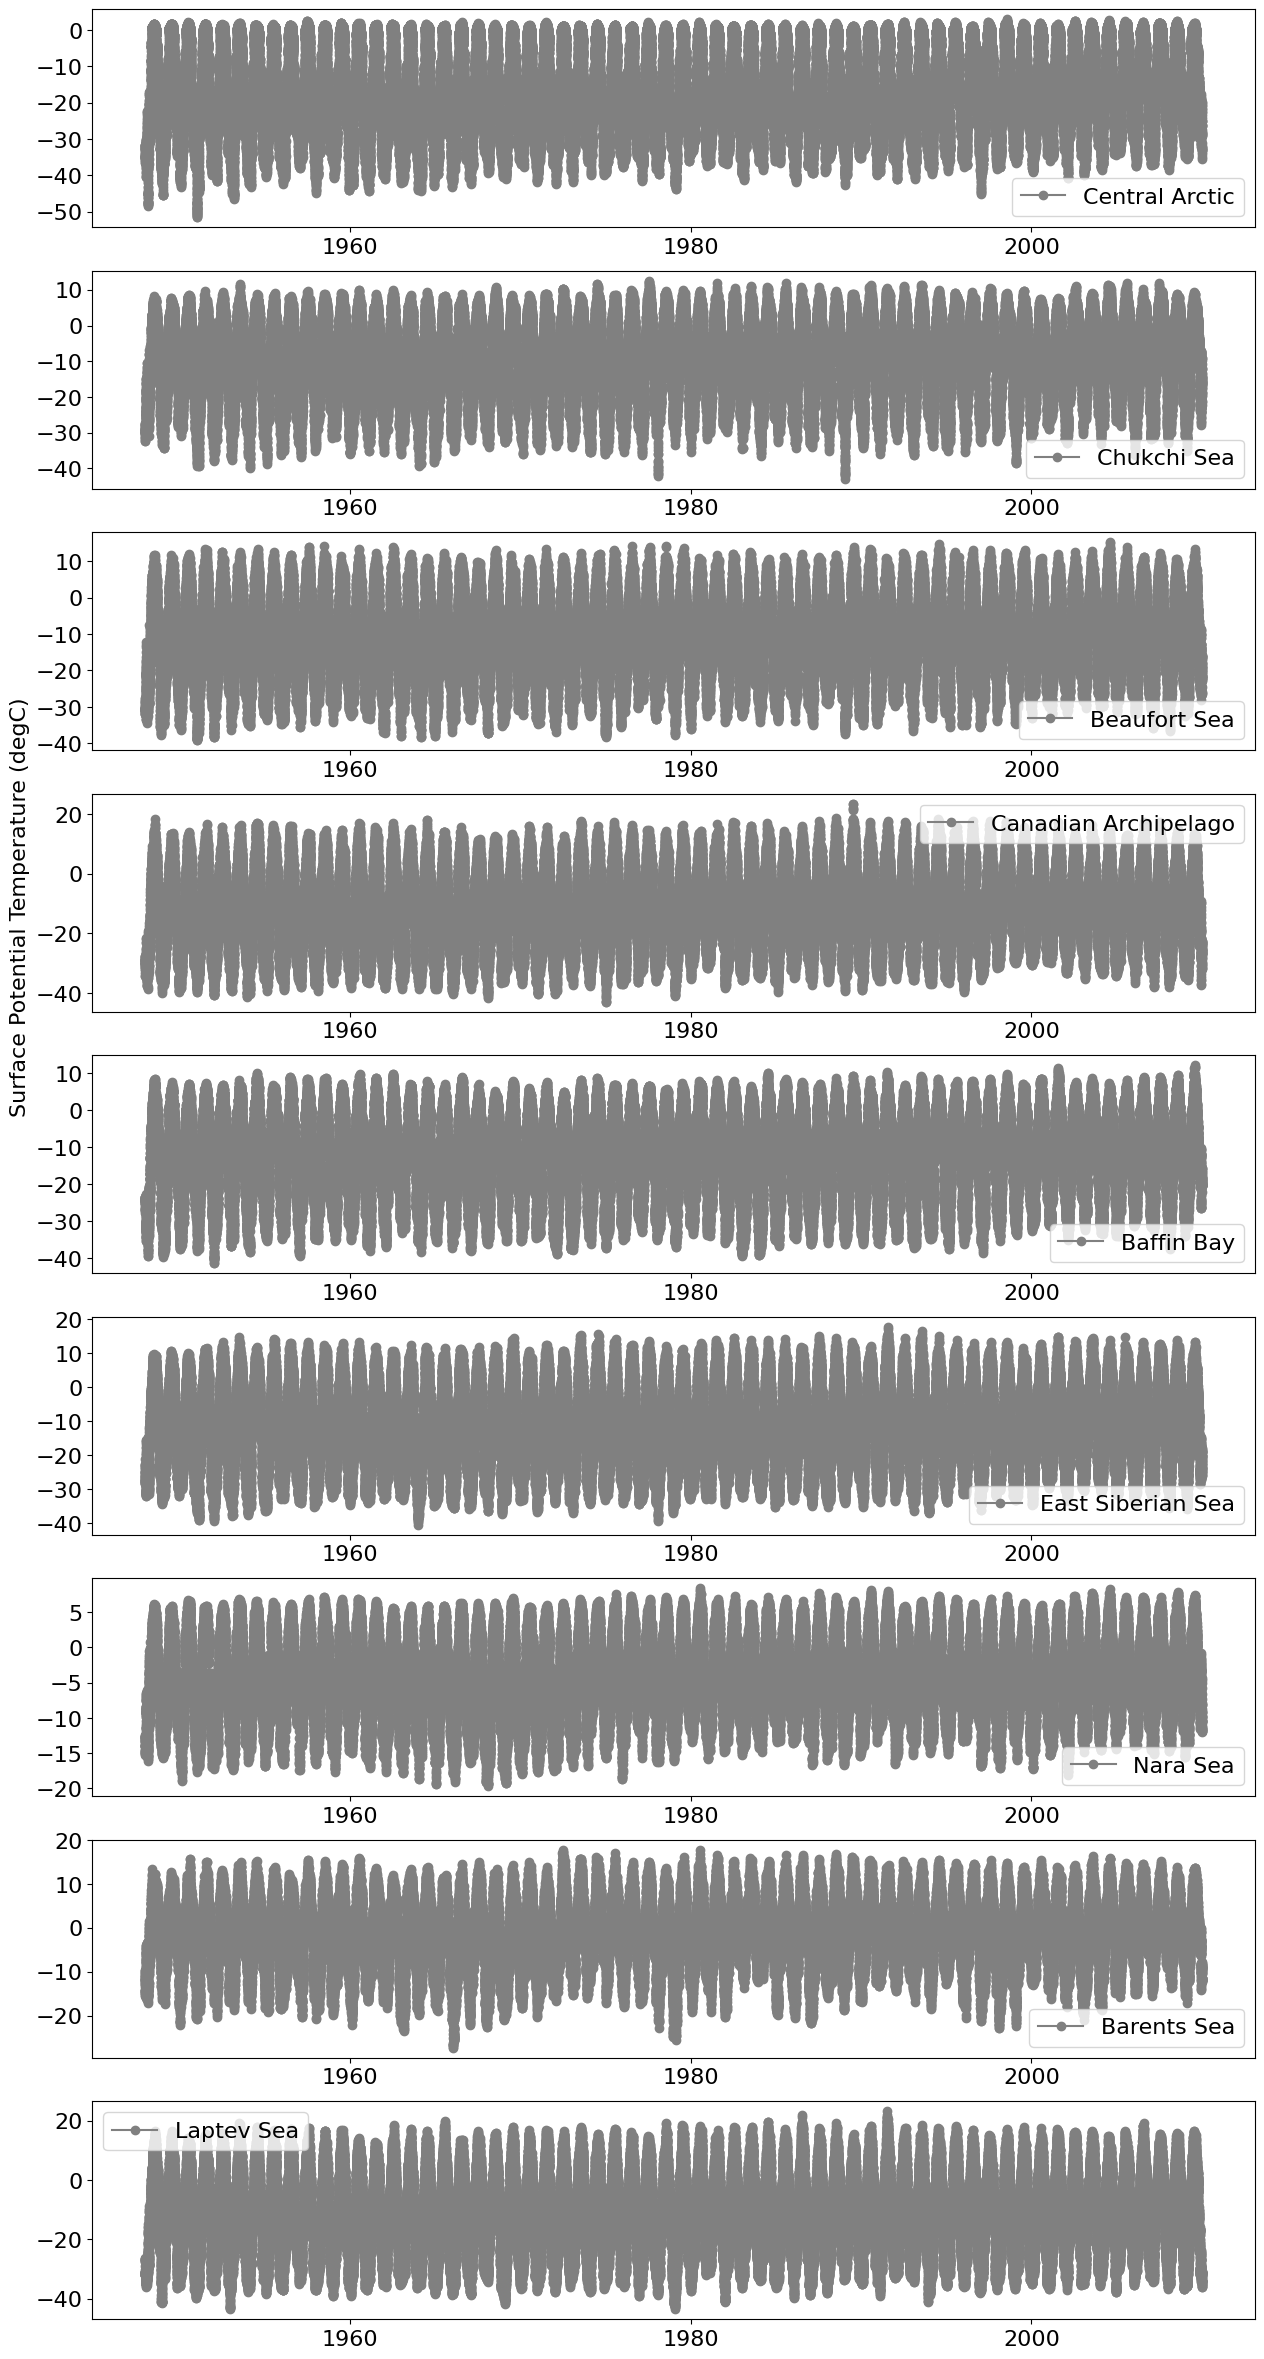

In [21]:
fig =plt.figure(figsize=(15, 30))
ax = fig.add_subplot(911)
pylab.plot(ds.time,temp_ao-273.15, 'o-', color='gray', label = 'Central Arctic')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(912)
pylab.plot(ds.time,temp_cs-273.15, 'o-', color='gray', label = 'Chukchi Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(913)
pylab.plot(ds.time,temp_bs-273.15, 'o-', color='gray', label = 'Beaufort Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(914)
pylab.plot(ds.time,temp_ca-273.15, 'o-', color='gray', label = 'Canadian Archipelago')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)

ax = fig.add_subplot(915)
pylab.plot(ds.time,temp_bb-273.15, 'o-', color='gray', label = 'Baffin Bay')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(916)
pylab.plot(ds.time,temp_ess-273.15, 'o-', color='gray', label = 'East Siberian Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(917)
pylab.plot(ds.time,temp_ns-273.15, 'o-', color='gray', label = 'Nara Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(918)
pylab.plot(ds.time,temp_bts-273.15, 'o-', color='gray', label = 'Barents Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(919)
pylab.plot(ds.time,temp_ls-273.15, 'o-', color='gray', label = 'Laptev Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

#ax = fig.add_subplot(5210)
#pylab.plot(ds.time,temp_ks, 'o-', color='gray', label = 'Kara Sea')
#plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

## Yearly average

In [22]:
df2 = ds.indexes['time'].to_datetimeindex()

In [23]:
%%time
yrs = np.arange(1948,2010,1)
mn = np.arange(1,13,1)

t_10_month = np.empty([62, 12,230,192])

ds2 = xr.Dataset()
for i, idx in enumerate(yrs):
    tmp = df2.year==idx
    for y, idy in enumerate(mn):
        t_10_month[i,y,:,:] = np.nanmean(ds.t_10[np.where((df2.year==idx) &  (df2.month==idy))],axis=0)

CPU times: user 2min 44s, sys: 2min 11s, total: 4min 56s
Wall time: 5min 38s


In [24]:
temp_ao = np.nanmean(t_10_month[:,:,218:230,:], axis=(1,2,3))
temp_cs = np.nanmean(t_10_month[:,:,191:218,96:110], axis = (1,2,3))
temp_bs = np.nanmean(t_10_month[:,:,191:218,110:125], axis = (1,2,3))
temp_ca = np.nanmean(t_10_month[:,:,191:218,125:139], axis = (1,2,3))
temp_bb = np.nanmean(t_10_month[:,:,191:218,139:166], axis = (1,2,3))
temp_ess = np.nanmean(t_10_month[:,:,191:218,77:96], axis = (1,2,3))
temp_ls = np.nanmean(t_10_month[:,:,191:218,48:77], axis = (1,2,3))
temp_ns = np.nanmean(t_10_month[:,:,191:218,list(range(11)) + list(range(-27,1))], axis = (1,2,3))
temp_bts =np.nanmean(t_10_month[:,:,191:218,11:28], axis = (1,2,3))
temp_ks = np.nanmean(t_10_month[:,:,191:218,28:48], axis = (1,2,3))

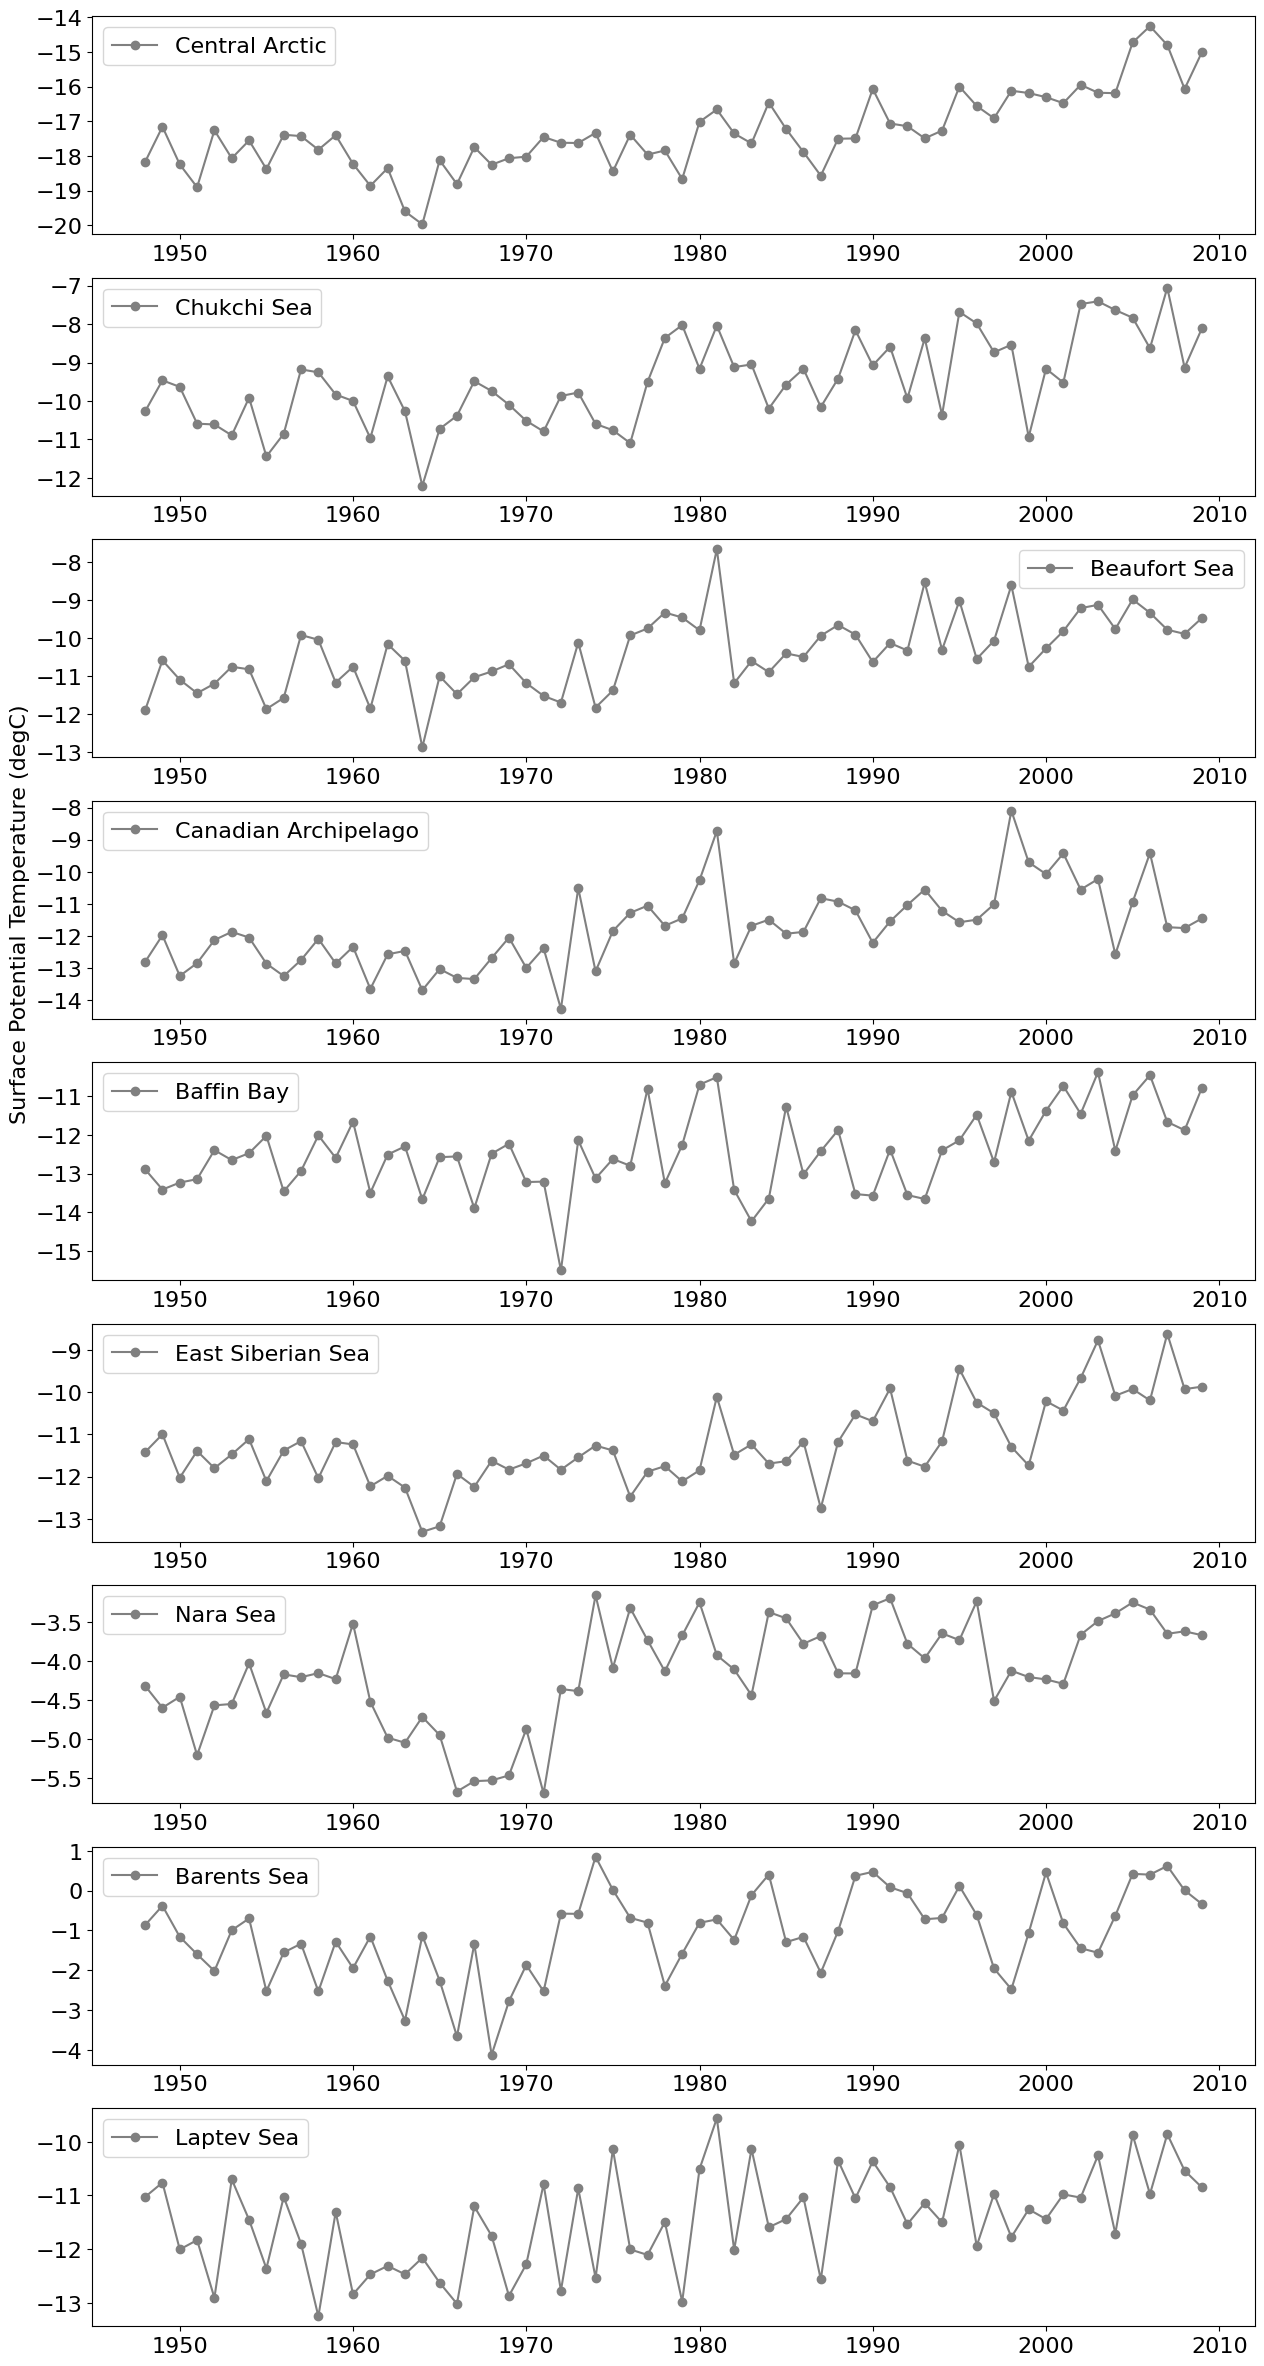

In [25]:
fig =plt.figure(figsize=(15, 30))
ax = fig.add_subplot(911)
pylab.plot(yrs,temp_ao-273.15, 'o-', color='gray', label = 'Central Arctic')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(912)
pylab.plot(yrs,temp_cs-273.15, 'o-', color='gray', label = 'Chukchi Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(913)
pylab.plot(yrs,temp_bs-273.15, 'o-', color='gray', label = 'Beaufort Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(914)
pylab.plot(yrs,temp_ca-273.15, 'o-', color='gray', label = 'Canadian Archipelago')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)

ax = fig.add_subplot(915)
pylab.plot(yrs,temp_bb-273.15, 'o-', color='gray', label = 'Baffin Bay')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(916)
pylab.plot(yrs,temp_ess-273.15, 'o-', color='gray', label = 'East Siberian Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(917)
pylab.plot(yrs,temp_ns-273.15, 'o-', color='gray', label = 'Nara Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(918)
pylab.plot(yrs,temp_bts-273.15, 'o-', color='gray', label = 'Barents Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(919)
pylab.plot(yrs,temp_ls-273.15, 'o-', color='gray', label = 'Laptev Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

#ax = fig.add_subplot(5210)
#pylab.plot(ds.time,temp_ks, 'o-', color='gray', label = 'Kara Sea')
#plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

## Now check every month throughout the 62 year cycle

In [26]:
temp_ao = np.nanmean(t_10_month[:,:,218:230,:], axis=(2,3)).flatten()
temp_cs = np.nanmean(t_10_month[:,:,191:218,96:110], axis = (2,3)).flatten()
temp_bs = np.nanmean(t_10_month[:,:,191:218,110:125], axis = (2,3)).flatten()
temp_ca = np.nanmean(t_10_month[:,:,191:218,125:139], axis = (2,3)).flatten()
temp_bb = np.nanmean(t_10_month[:,:,191:218,139:166], axis = (2,3)).flatten()
temp_ess = np.nanmean(t_10_month[:,:,191:218,77:96], axis = (2,3)).flatten()
temp_ls = np.nanmean(t_10_month[:,:,191:218,48:77], axis = (2,3)).flatten()
temp_ns = np.nanmean(t_10_month[:,:,191:218,list(range(11)) + list(range(-27,1))], axis = (2,3)).flatten()
temp_bts =np.nanmean(t_10_month[:,:,191:218,11:28], axis = (2,3)).flatten()
temp_ks = np.nanmean(t_10_month[:,:,191:218,28:48], axis = (2,3)).flatten()

In [27]:
yrs = np.arange(0,744,1)

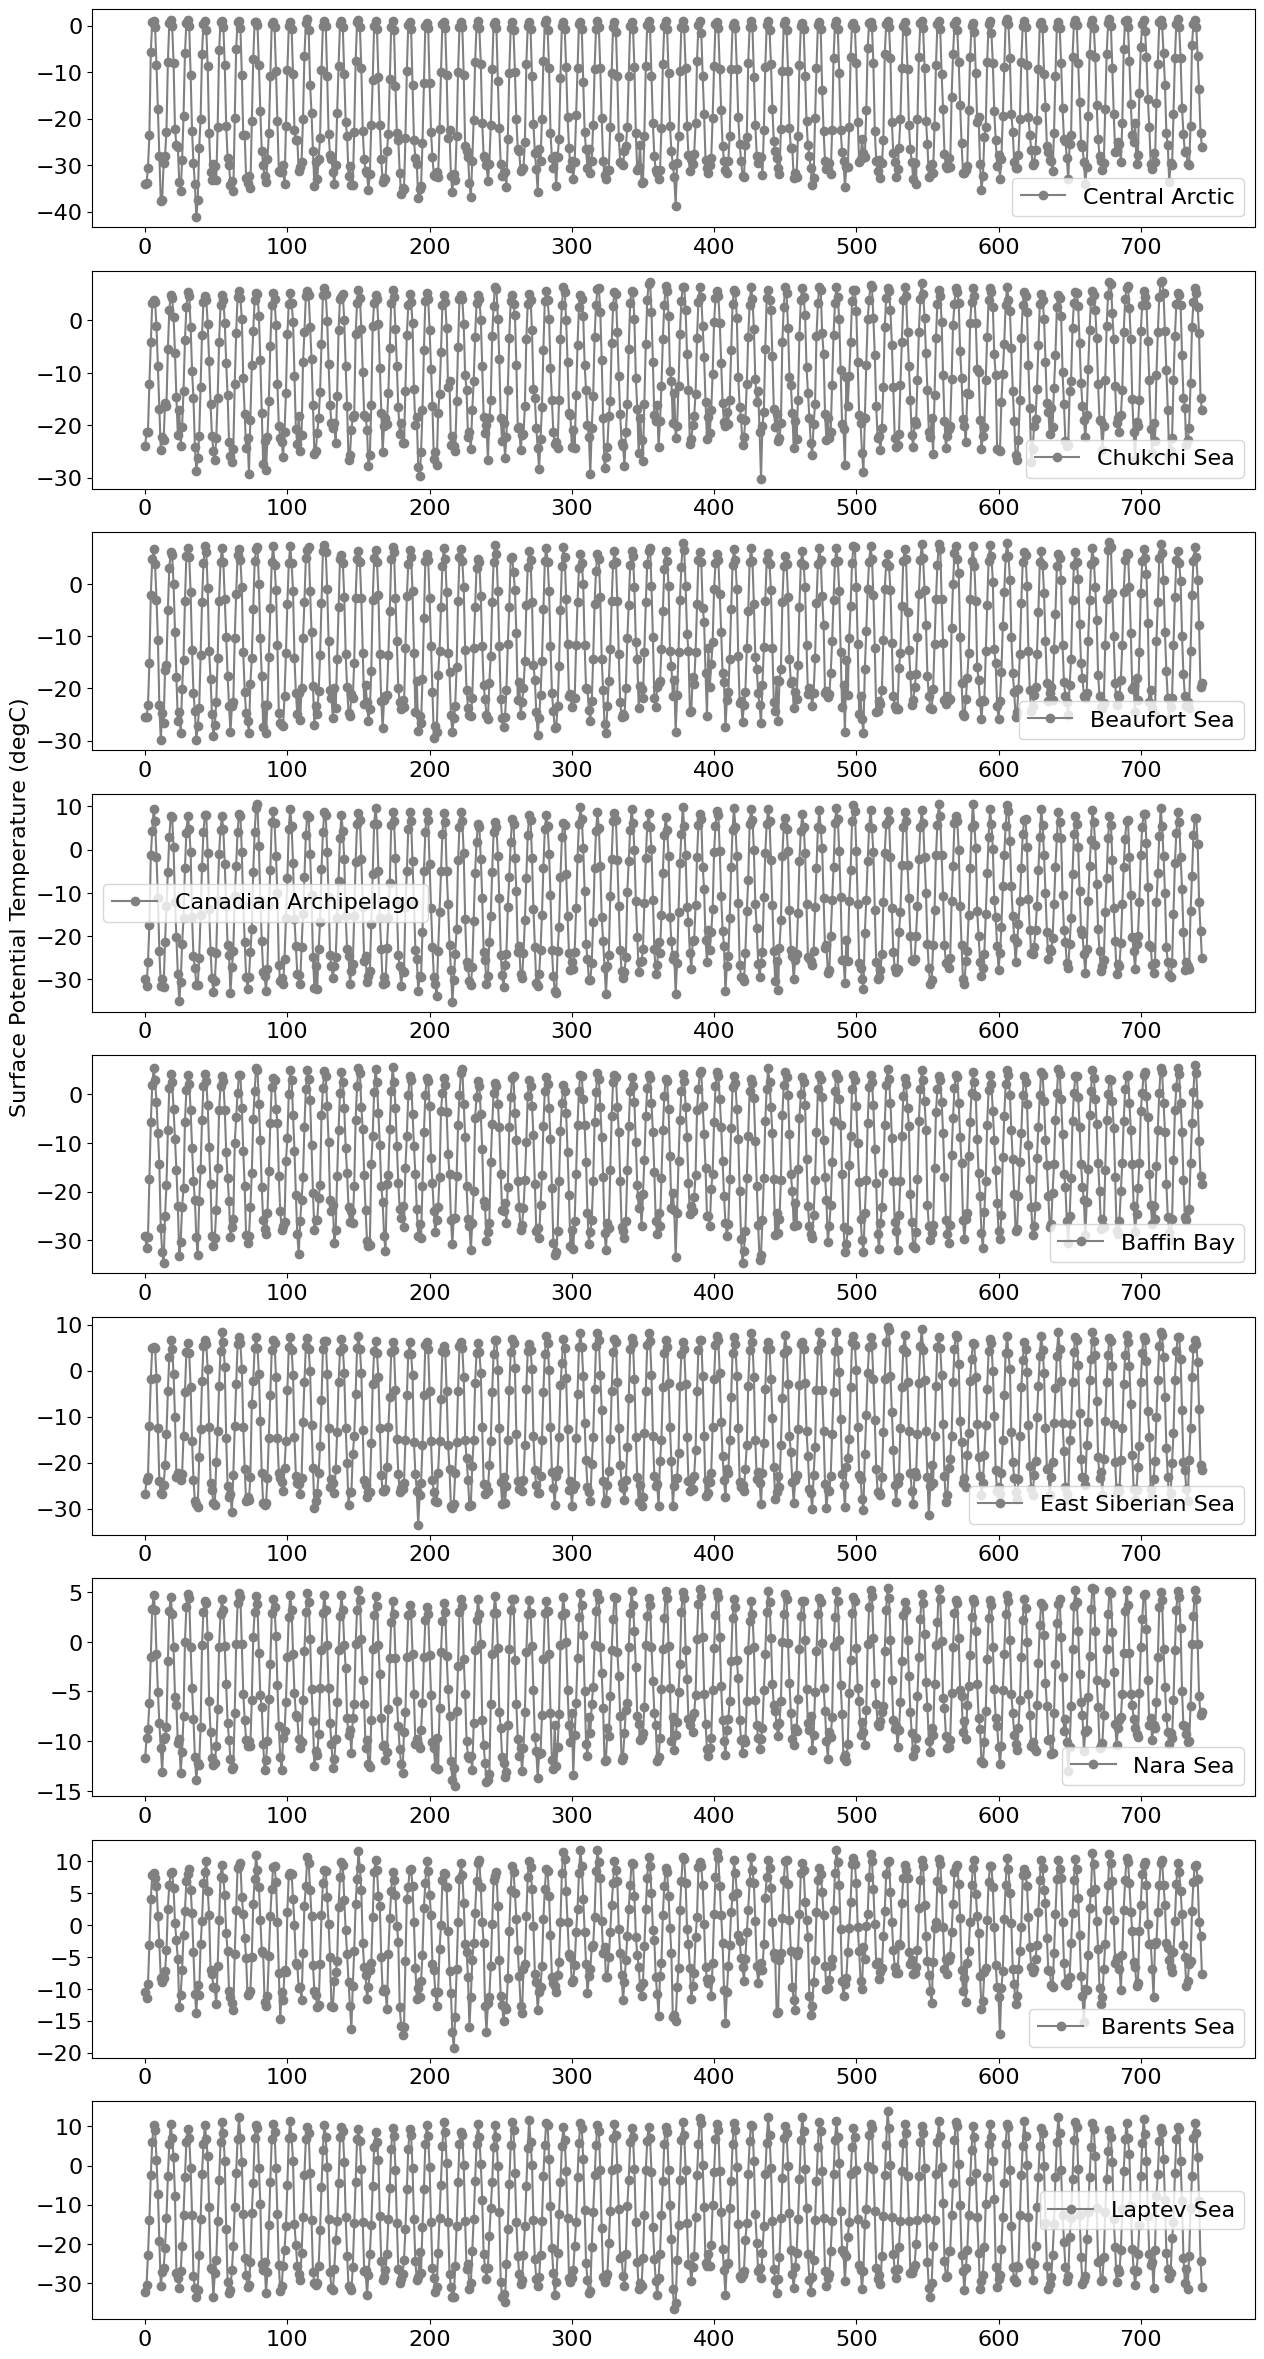

In [28]:
fig =plt.figure(figsize=(15, 30))
ax = fig.add_subplot(911)
pylab.plot(yrs,temp_ao-273.15, 'o-', color='gray', label = 'Central Arctic')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(912)
pylab.plot(yrs,temp_cs-273.15, 'o-', color='gray', label = 'Chukchi Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(913)
pylab.plot(yrs,temp_bs-273.15, 'o-', color='gray', label = 'Beaufort Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(914)
pylab.plot(yrs,temp_ca-273.15, 'o-', color='gray', label = 'Canadian Archipelago')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)

ax = fig.add_subplot(915)
pylab.plot(yrs,temp_bb-273.15, 'o-', color='gray', label = 'Baffin Bay')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(916)
pylab.plot(yrs,temp_ess-273.15, 'o-', color='gray', label = 'East Siberian Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(917)
pylab.plot(yrs,temp_ns-273.15, 'o-', color='gray', label = 'Nara Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(918)
pylab.plot(yrs,temp_bts-273.15, 'o-', color='gray', label = 'Barents Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(919)
pylab.plot(yrs,temp_ls-273.15, 'o-', color='gray', label = 'Laptev Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

#ax = fig.add_subplot(5210)
#pylab.plot(ds.time,temp_ks, 'o-', color='gray', label = 'Kara Sea')
#plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

## this is the actual values of the differnt regions that I want 
Arctic Regions

|Region| Latitude | Longitude | Matrix Inputs       |
|------|----------|-----------|---------------------|
|`ao`  |218:230   |:          |`[:,218:230,:]`      |
|`cs`  |191:218   |0:25       |`[:,191:218,96:110]`   |
|`bs`  |191:218   | 25:55     |`[:,191:218,110:125]`  |
|`ca`  |191:218   |55:80     |`[:,191:218,125:139]` |
|`bb`  |191:218   |80:135    |`[:,191:218,139:166]`|
|`ess` |191:218   |325:360    |`[:191:218,77:96]` |
|`ls`  |191:218   |270:325    |`[:,191:218,48:77]`|
|`ks`  |191:218   |233:270    |`[:,191:218,28:48]`|
|`bts` |191:218   |200:233    |`[:,191:218,11:28]`|
|`ns`  |191:218   |155:200    |`[:,191:218,166:11]`|

In [29]:
temp_ao = np.nanmean(t_10_month[:,:,218:230,:], axis=(2,3))
temp_cs = np.nanmean(t_10_month[:,:,191:218,96:110], axis = (2,3))
temp_bs = np.nanmean(t_10_month[:,:,191:218,110:125], axis = (2,3))
temp_ca = np.nanmean(t_10_month[:,:,191:218,125:139], axis = (2,3))
temp_bb = np.nanmean(t_10_month[:,:,191:218,139:166], axis = (2,3))
temp_ess = np.nanmean(t_10_month[:,:,191:218,77:96], axis = (2,3))
temp_ls = np.nanmean(t_10_month[:,:,191:218,48:77], axis = (2,3))
temp_ns = np.nanmean(t_10_month[:,:,191:218,list(range(11)) + list(range(-27,1))], axis = (2,3))
temp_bts =np.nanmean(t_10_month[:,:,191:218,11:28], axis = (2,3))
temp_ks = np.nanmean(t_10_month[:,:,191:218,28:48], axis = (2,3))

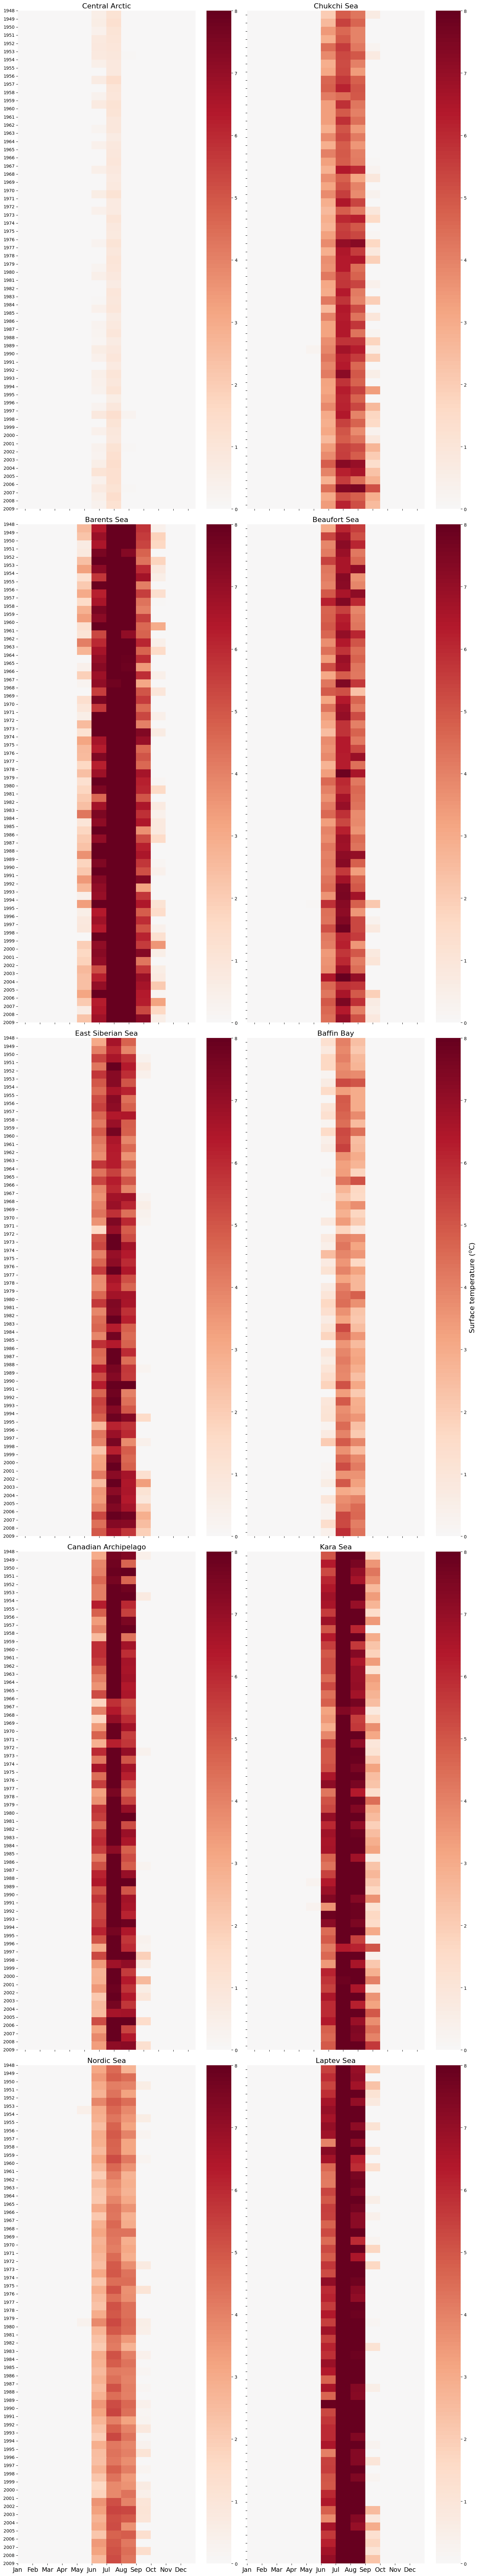

In [30]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
years = ['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
         "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
         "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
         "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
         "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']
fig = plt.figure(figsize=(15, 80))
gs = GridSpec(nrows=5, ncols=2)


#subplot 1
ax0 = fig.add_subplot(gs[0, 0])
ax= sns.heatmap(temp_ao[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Central Arctic', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[0, 1])
ax= sns.heatmap(temp_cs[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Chukchi Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[1, 1])
axx2= sns.heatmap(temp_bs[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
axx2.set_yticklabels(''); axx2.set_xticklabels('')
axx2.set_title('Beaufort Sea', fontsize=16)
plt.setp(axx2.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = axx2.collections[0].colorbar

ax0 = fig.add_subplot(gs[1, 0])
ax= sns.heatmap(temp_bts[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Barents Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[2, 0])
ax= sns.heatmap(temp_ess[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('East Siberian Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[3, 0])
ax= sns.heatmap(temp_ca[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Canadian Archipelago', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[4, 0])
ax= sns.heatmap(temp_ns[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticks(np.arange(len(years))); ax.set_xticks(np.arange(len(months)))
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels(months, fontsize=14)
ax.set_title('Nordic Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[3, 1])
ax= sns.heatmap(temp_ks[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Kara Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[4, 1])
ax= sns.heatmap(temp_ls[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_xticks(np.arange(len(months)))
ax.set_yticklabels(''); ax.set_xticklabels(months, fontsize=14)
ax.set_title('Laptev Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[2, 1])
ax= sns.heatmap(temp_bb[1:63,:]-273.15,center=0,cmap="RdBu_r",vmin=0,vmax=8)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Baffin Bay', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar
cbar.set_label('Surface temperature ($^o$C) ', fontsize =16)
fig.tight_layout()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/sst_corev2_heatmap_62yr',dpi=600, bbox_inches='tight')

### Try to create an anomaly plot like the one on this website: `https://www.climate4you.com/GlobalTemperatures.htm#Annual%20air%20temperatures%20global`
- Anomalies of global annual surface air temperature (MAAT) since 1850 according to Hadley CRUT, a cooperative effort between the Hadley Centre for Climate Prediction and Research and the University of East Anglia's Climatic Research Unit (CRU), UK. The average for 1979-2008 (30 yrs) has been set to zero, to make comparison with other temperature data series (above and below) easy. 

In [31]:
t_1979_2008 =  np.nanmean(t_10_month[31:61,:,:,:],axis=(0))
yrs_30 = np.arange(1979,2009,1)

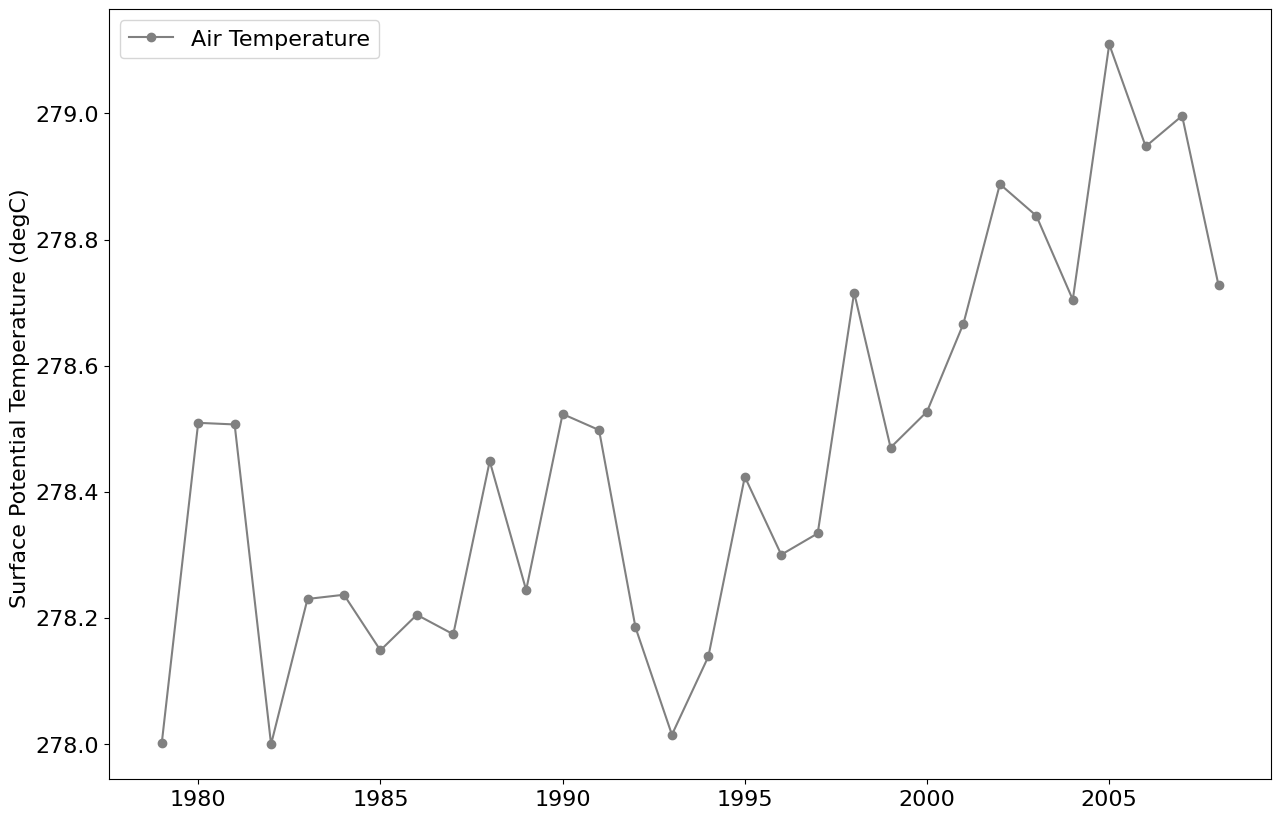

In [32]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(yrs_30,np.nanmean(t_10_month[31:61,:,:,:],axis=(1,2,3)), 'o-', color='gray', label = 'Air Temperature')
pylab.ylabel('Surface Potential Temperature (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

In [33]:
t_10_bias = t_10_month-t_1979_2008
years = np.arange(1948,2010,1)

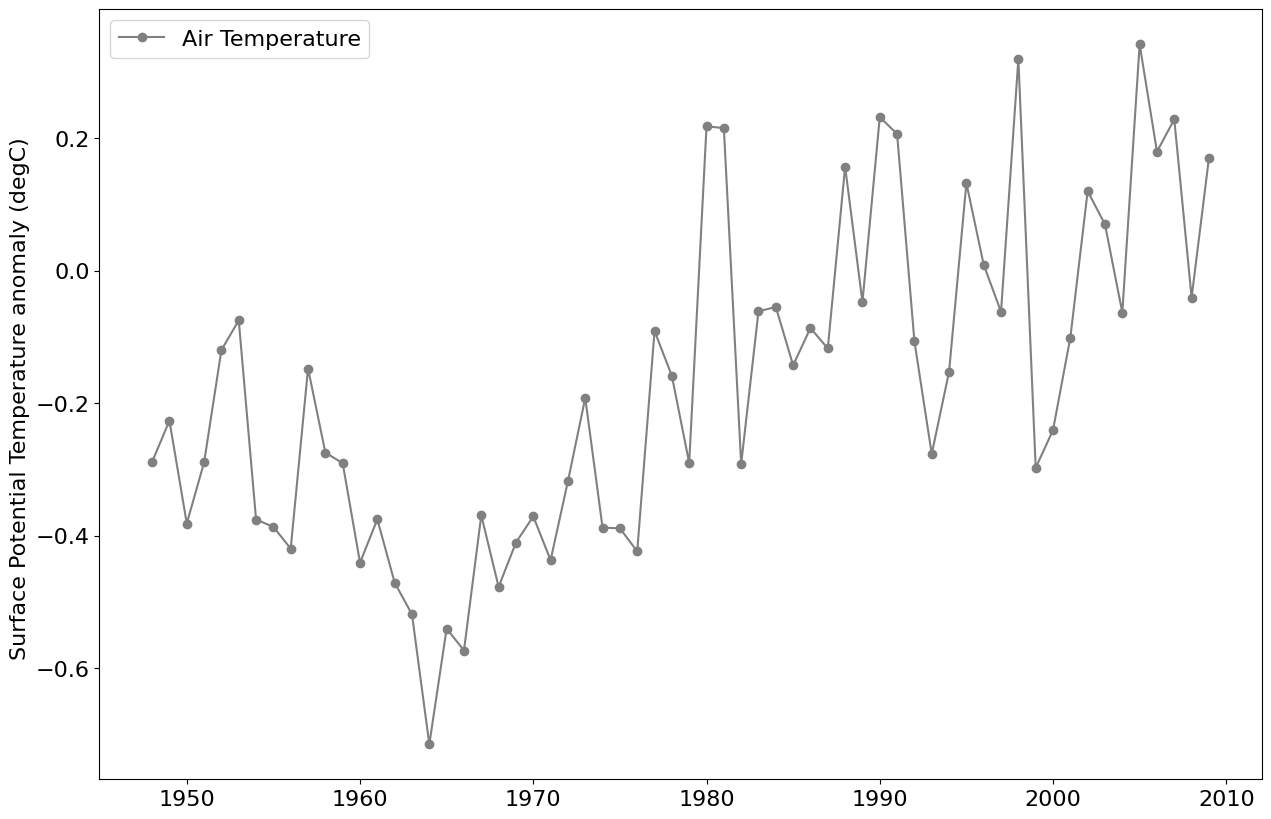

In [34]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
pylab.plot(years,np.nanmean(t_10_bias,axis=(1,2,3)), 'o-', color='gray', label = 'Air Temperature')
pylab.ylabel('Surface Potential Temperature anomaly (degC) ',fontsize = 16)
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

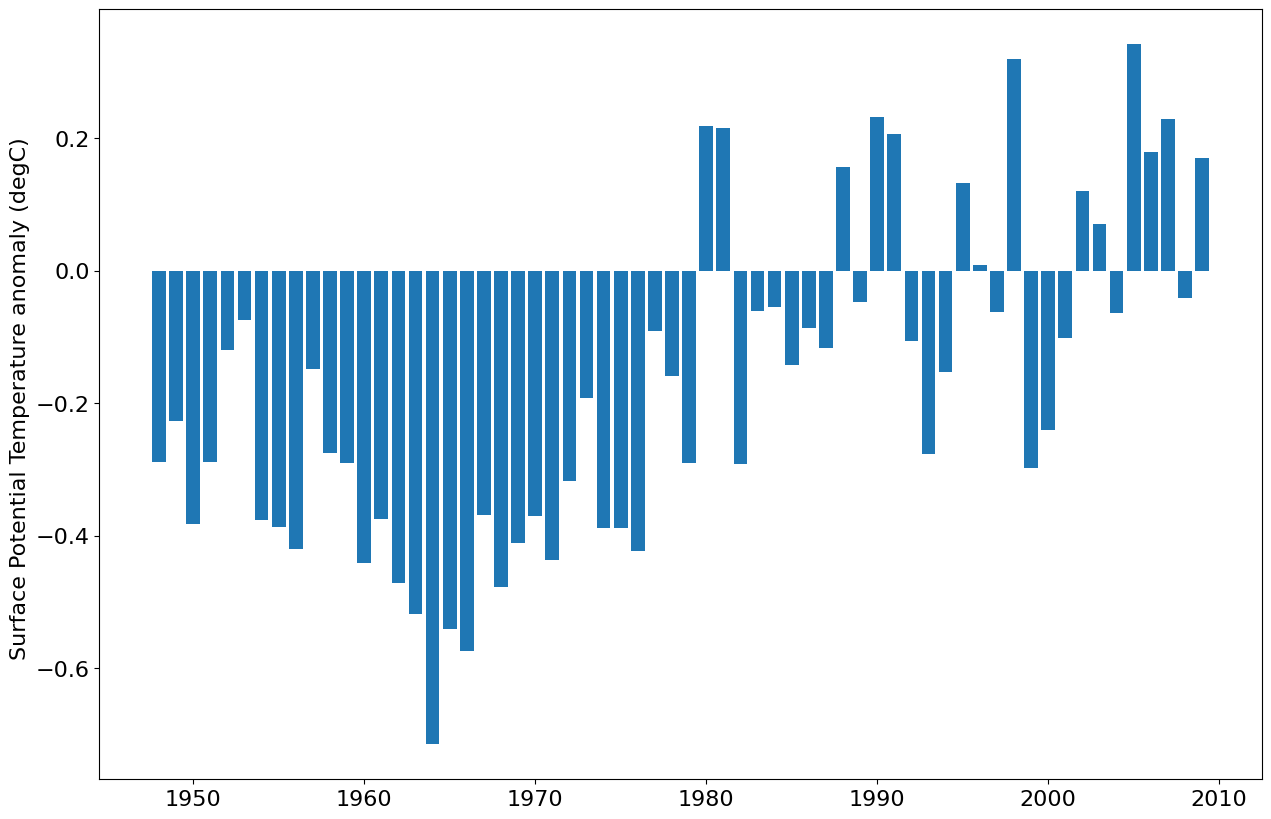

In [35]:
fig =plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.bar(years,np.nanmean(t_10_bias,axis=(1,2,3)))
plt.ylabel('Surface Potential Temperature anomaly (degC) ',fontsize = 16)
plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

In [36]:
temp_ao = np.nanmean(t_10_month[:,:,218:230,:] - np.nanmean(t_10_month[31:61,:,218:230,:],axis=(0)),axis=(1,2,3))
temp_cs = np.nanmean(t_10_month[:,:,191:218,96:110]- np.nanmean(t_10_month[31:61,:,191:218,96:110],axis=(0)),axis=(1,2,3))
temp_bs = np.nanmean(t_10_month[:,:,191:218,110:125]- np.nanmean(t_10_month[31:61,:,191:218,110:125],axis=(0)),axis=(1,2,3))
temp_ca = np.nanmean(t_10_month[:,:,191:218,125:139]- np.nanmean(t_10_month[31:61,:,191:218,125:139],axis=(0)),axis=(1,2,3))
temp_bb = np.nanmean(t_10_month[:,:,191:218,139:166]- np.nanmean(t_10_month[31:61,:,191:218,139:166],axis=(0)),axis=(1,2,3))
temp_ess = np.nanmean(t_10_month[:,:,191:218,77:96]- np.nanmean(t_10_month[31:61,:,191:218,77:96],axis=(0)),axis=(1,2,3))
temp_ls = np.nanmean(t_10_month[:,:,191:218,48:77]- np.nanmean(t_10_month[31:61,:,191:218,48:77],axis=(0)),axis=(1,2,3))
temp_ns = np.nanmean(t_10_month[:,:,191:218,list(range(11)) + list(range(-27,1))]- np.nanmean(t_10_month[31:61,:,191:218,list(range(11)) + list(range(-27,1))],axis=(0)),axis=(1,2,3))
temp_bts =np.nanmean(t_10_month[:,:,191:218,11:28]- np.nanmean(t_10_month[31:61,:,191:218,11:28],axis=(0)),axis=(1,2,3))
temp_ks = np.nanmean(t_10_month[:,:,191:218,28:48]- np.nanmean(t_10_month[31:61,:,191:218,28:48],axis=(0)),axis=(1,2,3))

In [37]:
temp_ao.shape

(62,)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

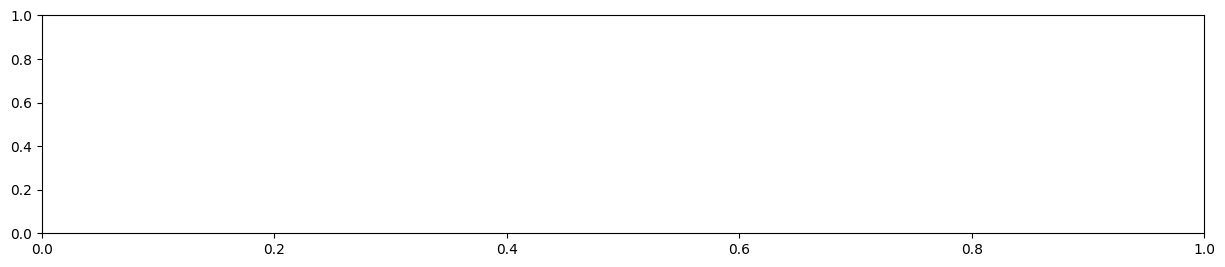

In [38]:
fig =plt.figure(figsize=(15, 30))
ax = fig.add_subplot(911)
plt.bar(yrs,temp_ao, label = 'Central Arctic')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(912)
plt.bar(yrs,temp_cs,  label = 'Chukchi Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(913)
plt.bar(yrs,temp_bs,  label = 'Beaufort Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(914)
plt.bar(yrs,temp_ca,  label = 'Canadian Archipelago')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

pylab.ylabel('Surface Potential Temperature anomaly (degC) ',fontsize = 16)

ax = fig.add_subplot(915)
plt.bar(yrs,temp_bb,  label = 'Baffin Bay')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(916)
plt.bar(yrs,temp_ess, label = 'East Siberian Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(917)
plt.bar(yrs,temp_ns,  label = 'Nara Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(918)
plt.bar(yrs,temp_bts,  label = 'Barents Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

ax = fig.add_subplot(919)
plt.bar(yrs,temp_ls,  label = 'Laptev Sea')
plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);

#ax = fig.add_subplot(5210)
#pylab.plot(ds.time,temp_ks, 'o-', color='gray', label = 'Kara Sea')
#plt.legend(fontsize= 16); plt.yticks(fontsize= 16); plt.xticks(fontsize= 16);
plt.show()

In [ ]:
temp_ao = np.nanmean(t_10_month[:,:,218:230,:] - np.nanmean(t_10_month[31:61,:,218:230,:],axis=(0)),axis=(2,3))
temp_cs = np.nanmean(t_10_month[:,:,191:218,96:110]- np.nanmean(t_10_month[31:61,:,191:218,96:110],axis=(0)),axis=(2,3))
temp_bs = np.nanmean(t_10_month[:,:,191:218,110:125]- np.nanmean(t_10_month[31:61,:,191:218,110:125],axis=(0)),axis=(2,3))
temp_ca = np.nanmean(t_10_month[:,:,191:218,125:139]- np.nanmean(t_10_month[31:61,:,191:218,125:139],axis=(0)),axis=(2,3))
temp_bb = np.nanmean(t_10_month[:,:,191:218,139:166]- np.nanmean(t_10_month[31:61,:,191:218,139:166],axis=(0)),axis=(2,3))
temp_ess = np.nanmean(t_10_month[:,:,191:218,77:96]- np.nanmean(t_10_month[31:61,:,191:218,77:96],axis=(0)),axis=(2,3))
temp_ls = np.nanmean(t_10_month[:,:,191:218,48:77]- np.nanmean(t_10_month[31:61,:,191:218,48:77],axis=(0)),axis=(2,3))
temp_ns = np.nanmean(t_10_month[:,:,191:218,list(range(11)) + list(range(-27,1))]- np.nanmean(t_10_month[31:61,:,191:218,list(range(11)) + list(range(-27,1))],axis=(0)),axis=(2,3))
temp_bts =np.nanmean(t_10_month[:,:,191:218,11:28]- np.nanmean(t_10_month[31:61,:,191:218,11:28],axis=(0)),axis=(2,3))
temp_ks = np.nanmean(t_10_month[:,:,191:218,28:48]- np.nanmean(t_10_month[31:61,:,191:218,28:48],axis=(0)),axis=(2,3))

In [ ]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
years = ['1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
         "1960",'1961','1962','1963','1964','1965','1966','1967','1968','1969',
         "1970",'1971','1972','1973','1974','1975','1976','1977','1978','1979',
         "1980",'1981','1982','1983','1984','1985','1986','1987','1988','1989',
         "1990",'1991','1992','1993','1994','1995','1996','1997','1998','1999',
         '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']
fig = plt.figure(figsize=(15, 80))
gs = GridSpec(nrows=5, ncols=2)


#subplot 1
ax0 = fig.add_subplot(gs[0, 0])
ax= sns.heatmap(temp_ao,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Central Arctic', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[0, 1])
ax= sns.heatmap(temp_cs,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Chukchi Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[1, 1])
axx2= sns.heatmap(temp_bs,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
axx2.set_yticklabels(''); axx2.set_xticklabels('')
axx2.set_title('Beaufort Sea', fontsize=16)
plt.setp(axx2.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = axx2.collections[0].colorbar

ax0 = fig.add_subplot(gs[1, 0])
ax= sns.heatmap(temp_bts,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Barents Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[2, 0])
ax= sns.heatmap(temp_ess,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('East Siberian Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[3, 0])
ax= sns.heatmap(temp_ca,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(years)));
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels('')
ax.set_title('Canadian Archipelago', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[4, 0])
ax= sns.heatmap(temp_ns,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(years))); ax.set_xticks(np.arange(len(months)))
ax.set_yticklabels(years, fontsize=10); ax.set_xticklabels(months, fontsize=14)
ax.set_title('Nordic Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[3, 1])
ax= sns.heatmap(temp_ks,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Kara Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[4, 1])
ax= sns.heatmap(temp_ls,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_xticks(np.arange(len(months)))
ax.set_yticklabels(''); ax.set_xticklabels(months, fontsize=14)
ax.set_title('Laptev Sea', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar

ax0 = fig.add_subplot(gs[2, 1])
ax= sns.heatmap(temp_bb,center=0,cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticklabels(''); ax.set_xticklabels('')
ax.set_title('Baffin Bay', fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar
cbar.set_label('Surface temperature ($^o$C) ', fontsize =16)
fig.tight_layout()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/sst_corev2_heatmap_bias',dpi=600, bbox_inches='tight')